In [190]:
% some housekeeping stuff
register_graphics_toolkit ("gnuplot");
available_graphics_toolkits ();
graphics_toolkit ("gnuplot")
clear
% load packages
pkg load statistics
% end of housekeeping

# Monte Carlo 

 - it is possible to determine confidence in model fits by simulating datasets based on the initial bestfit and the original data
 - you basically replace a random portion (often 1/3) of the data with simulated data based on the best fit model
 - for linear regression we have good methods to represent confidence intervals but this is not true for nonlinear regression
 - let's try MC first with our linear model from the welding example (lecture 2)

b =

   65.340
   11.660

s = 2.9535
seB =

   22.3832
    8.2874



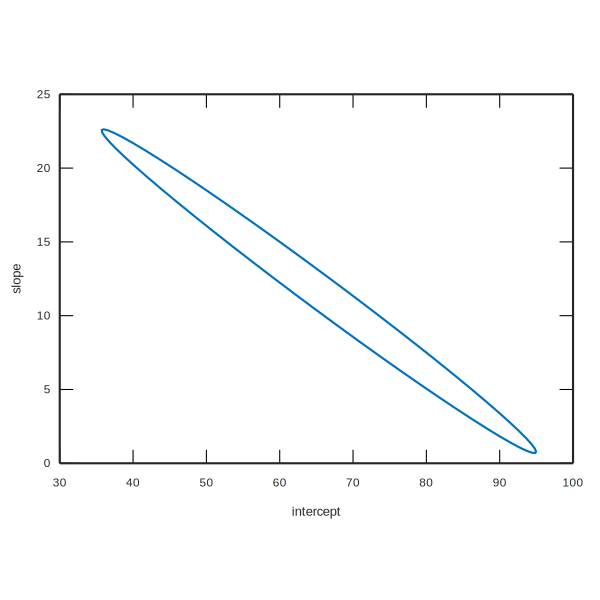

In [191]:
%plot -s 600,600 -f 'svg'

x=[2 2.5 2.5 2.75 3 3 3];
y=[89 97 91 98 100 104 97];
X=[ones(size(x')) x']; 
y=y';
b=inv(X'*X)*X'*y
P=2; % two parameters
N=length(x); %number of observatrions
nu=N-P; % degrees of freedom.  no. obs-no.parameters
bestmodel=X*b;
s2=sum((bestmodel-y).^2)./nu; s=sqrt(s2)
tvalue=tinv(0.975,nu);
seB=s*sqrt(diag(inv(X'*X)))*tvalue
w=0:0.1:2.5*pi; % for plotting the elippse

[Q,R]=qr(X); R1 = R(1:2,1:2); invR1=inv(R1); Fvalue=finv(0.95,P,N-P);

for i=1:length(w)
	    scalar=sqrt(P*s2*Fvalue);
        BETA(:,i)=b+scalar*invR1*([cos(w(i)); sin(w(i))]);
    end

plot(BETA(1,:),BETA(2,:),'linewidth',2)
set(gca,'fontsize',11,'linewidth',2)
xlabel('intercept'); ylabel('slope')


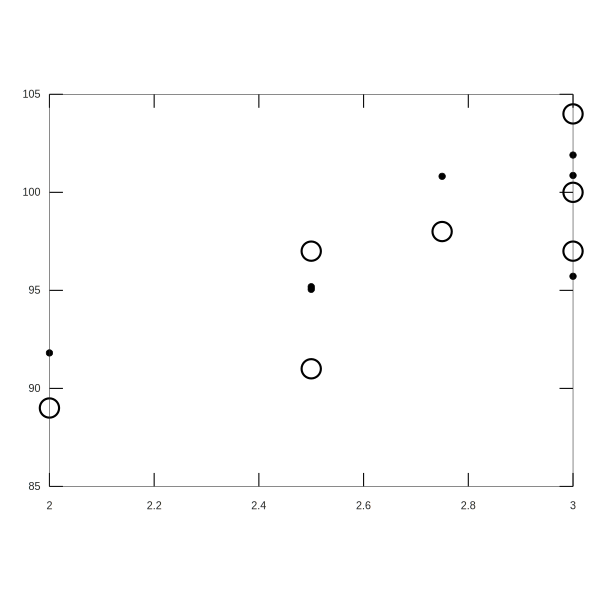

In [192]:
%plot -s 600,600 -f 'svg'

residuals=y-bestmodel; sestimate=std(residuals);

% need to make simulated dataset

count = 1:length(y); % an integer vector with an entry in order per each point in the data

% replacing all data seems to work better

%noreplace=round(length(y)/3); % replace 1/3 of the datapoints
noreplace=round(length(y)/1); % replace all of the datapoints

indexreplace = randsample(count,noreplace); % pick at random wich of the 1/3 of the points to replace.

Ynew=y; % initialize the simulated data just as the original data.

for i=1:length(indexreplace)
    Ynew(indexreplace(i))=bestmodel(indexreplace(i))+randn(1,1)*sestimate;
end

plot(x,y,'ko',x,Ynew,'k.')


ans = 11.747
ans = 2.9324


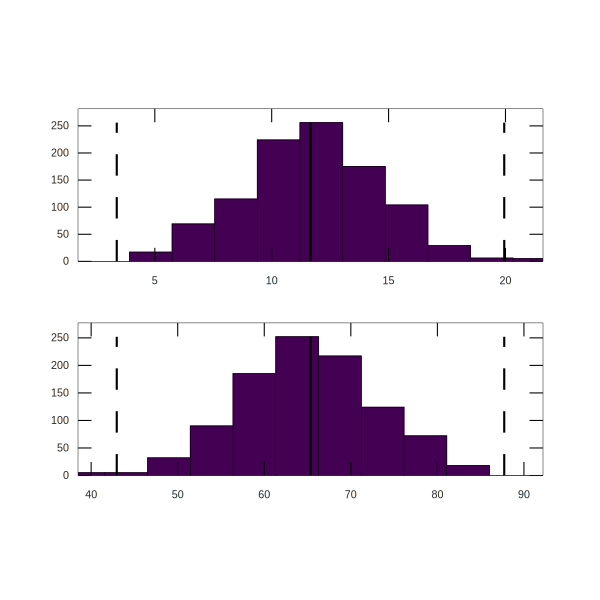

In [193]:
%plot -s 600,600 -f 'svg'

%now do this 1000 times!  and fit the two parameters each time
%if I were doign this in the desktop Octave or Matlab I would make a function that returns the random data


for j=1:1000

    Ynew=y; % initialize the simulated data just as the original data.

    for i=1:length(indexreplace)
        Ynew(indexreplace(i))=bestmodel(indexreplace(i))+randn(1,1)*sestimate;
    end
    
    MCbetas(:,j)=inv(X'*X)*X'*Ynew;
    
end

MCslope=MCbetas(2,:); MCintercepts=MCbetas(1,:);

mean(MCslope)
std(MCslope)

subplot(211); 
[counts,centres]=hist(MCslope,10);
hist(MCslope,10)
hold on; plot([b(2) b(2)],[0 max(counts)],'k','linewidth',2)
plot([b(2)-seB(2) b(2)-seB(2)],[0 max(counts)],'k--','linewidth',2)
plot([b(2)+seB(2) b(2)+seB(2)],[0 max(counts)],'k--','linewidth',2)
axis([b(2)-seB(2)*1.2 b(2)+seB(2)*1.2 0 max(counts)*1.1])

subplot(212)
[counts,centres]=hist(MCintercepts,10);
hist(MCintercepts,10)
hold on; plot([b(1) b(1)],[0 max(counts)],'k','linewidth',2)
plot([b(1)-seB(1) b(1)-seB(1)],[0 max(counts)],'k--','linewidth',2)
plot([b(1)+seB(1) b(1)+seB(1)],[0 max(counts)],'k--','linewidth',2)
axis([b(1)-seB(1)*1.2 b(1)+seB(1)*1.2 0 max(counts)*1.1])


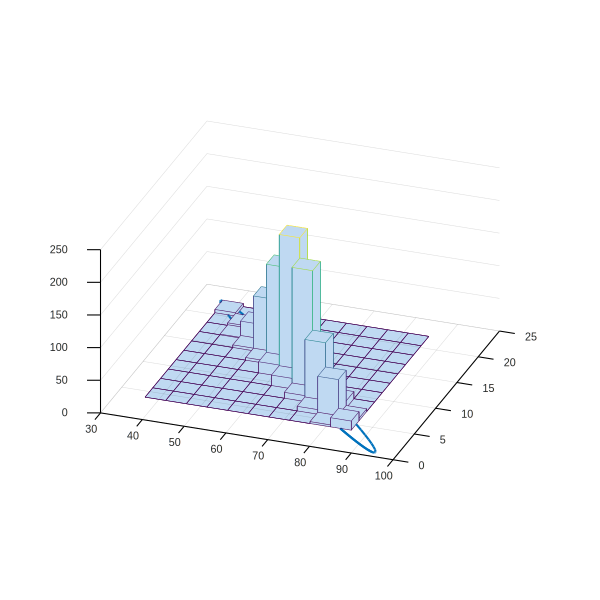

In [194]:
%plot -s 600,600 -f 'svg'

hist3(MCbetas',[10 10])
view(20,40)

hold on
plot(BETA(1,:),BETA(2,:),'linewidth',2)

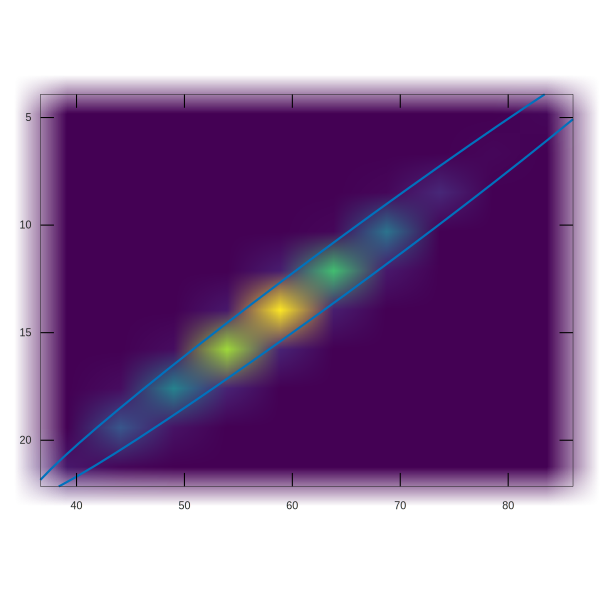

In [195]:
[counts, centers] = hist3 (MCbetas');
imagesc (centers{1}, centers{2}, counts)
hold on
plot(BETA(1,:),BETA(2,:),'linewidth',2)

# excercise 5

start by remaking the plot from Lecture 2 that shows the confidence interval about the regression line.  The "bow tie" I often call it.

just cut an paste the code here.

Then add the 1000 best fit lines from this excercise to that plot (you need to add     fit(:,j)=X*MCbetas(:,j);
into your 1000 simulations loop.  this is just bestfitmodel=X*b like we already did but the index puts it into a seperate column each time)



